In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#Look at data table
data = pd.read_sql("SELECT * FROM measurement", conn)
data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
#Total dates
session.query(func.count(measurement.date)).all()

[(19550)]

In [12]:
#Retrieve earliest date
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01')

In [13]:
#Retreive latest date
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(latest_date)

('2017-08-23',)


# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

one_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
date_prec = session.query(measurement.date, measurement.prcp).filter(measurement.date > one_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
dataframe = pd.DataFrame(date_prec, columns=['Date','Precipitation'])
dataframe = dataframe.dropna()
dataframe.set_index('Date', inplace=True)

# Sort the dataframe by date
dataframe.sort_index(ascending='False')

# Use Pandas Plotting with Matplotlib to plot the data


,Precipitation
Date,
2016-08-24,0.08
2016-08-24,1.22
2016-08-24,2.28
2016-08-24,1.45
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


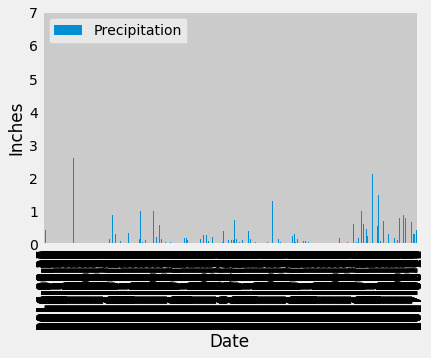

In [15]:
dataframe.plot.bar()
plt.ylabel('Inches')
plt.show()

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precip_df = pd.DataFrame(data)
calculate = precip_df['prcp'].describe()
new_df = pd.DataFrame(calculate)
new_df

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [17]:
# Design a query to show how many stations are available in this dataset?
session.query(measurement.station).group_by(measurement.station).all()


[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [measurement.station,func.count(measurement.date)]
station_count = session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.date)).all()
station_count

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel1 = [measurement.station,func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]
station_calc = session.query(*sel1).filter(measurement.station =='USC00519281').group_by(measurement.station).all()
station_calc

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

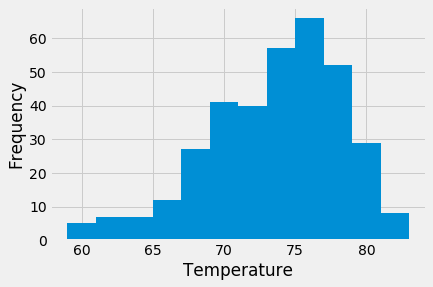

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
date_tobs = session.query(measurement.tobs).filter(measurement.date > one_year).filter(measurement.station == 'USC00519281').all()
date_tobs

# Save the query results as a Pandas DataFrame and create histogram
df = pd.DataFrame(date_tobs, columns=['Temperature'])
df.hist(bins=12)
plt.title('')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()
